In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [ ]:
data = pd.read_csv('data-2.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.isna().sum().sum()

553838

In [ ]:
data

,id,class,c1,c2,c3,c4,c5,c6,c7,c8,...,c53,c54,c55,c56,c57,c58,c59,c60,created_at,updated_at
0,1,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-699300431.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,15399,545988074,67530697,1040736,0,левое,100,150.0,NaN,0.0,...,NaN,1034116331,Т,К,Э,NaN,л,(РЕ),NaN,NaN
15399,15400,545988074,1387651697,1040736,0,левое,100,200.0,NaN,0.0,...,NaN,1034116331,Т,NaN,NaN,Э,л,(РЕ),NaN,NaN
15400,15401,545988074,67530697,1040736,0,левое,100,200.0,NaN,0.0,...,NaN,1034116331,Т,К,NaN,Э,л,(РЕ),NaN,NaN
15401,15402,545988074,1387651697,1040736,0,левое,100,200.0,NaN,0.0,...,NaN,1034116331,Т,NaN,Э,Э,л,(РЕ),NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15403 non-null  int64  
 1   class       15403 non-null  int64  
 2   c1          15403 non-null  int64  
 3   c2          15403 non-null  int64  
 4   c3          15403 non-null  int64  
 5   c4          15403 non-null  object 
 6   c5          15401 non-null  object 
 7   c6          15401 non-null  float64
 8   c7          41 non-null     object 
 9   c8          15401 non-null  float64
 10  c9          15403 non-null  int64  
 11  c10         0 non-null      float64
 12  c11         0 non-null      float64
 13  c12         768 non-null    object 
 14  c13         0 non-null      float64
 15  c14         15401 non-null  object 
 16  c15         7683 non-null   object 
 17  c16         0 non-null      float64
 18  c17         15401 non-null  object 
 19  c18         15401 non-nul

In [ ]:
obj_cols = ['c4', 'c5', 'c7', 'c12', 'c14', 'c15', 'c17', 'c18', 'c20', 'c27', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60']

In [ ]:
for i in obj_cols:
  data[i] = pd.core.dtypes.cast.astype_nansafe(data[i], pd.StringDtype(), skipna = True)

In [ ]:
asfloat_cols = []
for i in obj_cols:
  for j in range(len(data[i])):
    if type(data[i][j]) == str and ',' in data[i][j]:
      asfloat_cols.append(i)
      data[i][j] = data[i][j].replace(',' , '.')

Приведём к float только те признаки, которые изначально представлялись как числа

In [ ]:
for i in set(asfloat_cols):
  data[i] = data[i].astype(float)

Удалим наполовину пустые признаки

In [ ]:
na_cols = []
for i in data.columns:
  if data[i].isna().sum() > len(data)/2:
    na_cols.append(i)

In [ ]:
data_drop = data.drop(na_cols, axis = 1)

In [ ]:
add_cols_ind=[]
for i,k in enumerate(data_drop.isna().sum()):
  if k > 0:
    add_cols_ind.append(i)

In [ ]:
add_cols=[]
for i in add_cols_ind:
  add_cols.append(data_drop.columns[i])

3. Проанализируем признаки с небольшим кол-вом пропусков. Удалим константные признаки (c27 ,с47). В остальных пропуски заменим модой (среднее в большинстве признаков будет сильно отличаться от имеющихся данных). Это облегчит дальнейшую работу с данными, так как некоторые признаки категориальные. 

        P.S. как вариант пропуски можно было бы и заменить медианой, этот метод так же хорош как и замена модой, так как не добавим нового значения (кол-во уникальных значений не изменится)

In [ ]:
for i in add_cols:
  print('\n',data_drop[i].value_counts())


 100                 7680
30                  6912
50                   768
Не предъявляется      35
9                      6
Name: c5, dtype: Int64

 200.0     7680
250.0     3848
150.0     3840
50.0        18
2000.0       5
500.0        4
100.0        3
1000.0       3
Name: c6, dtype: int64

  0.000000e+00    15360
-6.993004e+08       24
 9.531769e+08       12
 1.756160e+09        5
Name: c8, dtype: int64

 0.35       7680
0.20       7680
10.00         4
16.00         4
1.50          4
6.00          3
2.50          3
4.00          3
500.00        2
400.00        2
300.00        2
240.00        2
150.00        1
1000.00       1
185.00        1
95.00         1
120.00        1
70.00         1
35.00         1
25.00         1
8.00          1
5.00          1
3.00          1
50.00         1
Name: c14, dtype: int64

 50.7000    7680
88.8000    7680
3.3000        2
1.2000        2
1.9000        2
12.7000       2
4.7500        2
7.6000        2
0.2640        1
0.0834        1
0.0183        1


In [ ]:
for i in add_cols:
  data_drop[i].fillna(data_drop[i].mode()[0], inplace=True)

Признак с43 полностью заменится на одно значение, можем его удалить

In [ ]:
data_full = data_drop.drop(['id', 'c27', 'c47', 'c43'] , axis = 1)

4. Отберем категориальные признаки

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in data_full.columns:
  lenght = len(data_full[i].value_counts())
  print('\n', i, ':',lenght)
  if lenght == 2:
    le = LabelEncoder()
    data_full[i] = le.fit_transform(data_full[i])


 class : 2

 c1 : 1962

 c2 : 6

 c3 : 5

 c4 : 2

 c5 : 5

 c6 : 8

 c8 : 4

 c9 : 5

 c14 : 24

 c17 : 37

 c18 : 37

 c20 : 2

 c22 : 21

 c23 : 31

 c32 : 6

 c40 : 4

 c46 : 3

 c48 : 2

 c54 : 10

 c55 : 4


Так как нет определённого контекста признаков, предпологаю что кол-во уникальных значений категориальных признаков не больше 10, также лучше использовать OneHotEncoding, так не уверены в достоверности отбора категориальных признаков

In [ ]:
cat_cols = []
for i in data_full.columns:
  if 2 < len(data_full[i].value_counts()) <= 10:
    cat_cols.append(i)

In [ ]:
data_full_dum = pd.get_dummies(data_full, columns = cat_cols)

In [ ]:
data_full_dum

,class,c1,c4,c14,c17,c18,c20,c22,c23,c48,...,c54_-416966437,c54_0,c54_1034116331,c54_1386543199,c54_1639198316,c54_1639198453,c55_В,c55_П,c55_Пс,c55_Т
0,0,0,1,0.20,50.7,50.70,0,2.0,0.85,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0.20,50.7,50.70,0,2.0,0.85,0,...,0,1,0,0,0,0,0,0,1,0
2,1,1014559500,0,1.50,12.7,14.60,1,7.0,0.52,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1017330063,0,1.50,11.9,13.68,0,49.0,0.32,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1482170768,0,1.50,12.7,14.60,1,19.0,0.32,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,0,67530697,0,0.35,50.7,50.70,0,6.0,0.11,0,...,0,0,1,0,0,0,0,0,0,1
15399,0,1387651697,0,0.35,50.7,50.70,0,6.0,0.11,0,...,0,0,1,0,0,0,0,0,0,1
15400,0,67530697,0,0.35,50.7,50.70,0,6.0,0.11,0,...,0,0,1,0,0,0,0,0,0,1
15401,0,1387651697,0,0.35,50.7,50.70,0,6.0,0.11,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmsc = MinMaxScaler()

In [ ]:
data_norm = mmsc.fit_transform(data_full_dum)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
cluster_al = linkage(data_norm, method = 'ward', metric = 'euclidean')
link_df = pd.DataFrame(cluster_al)

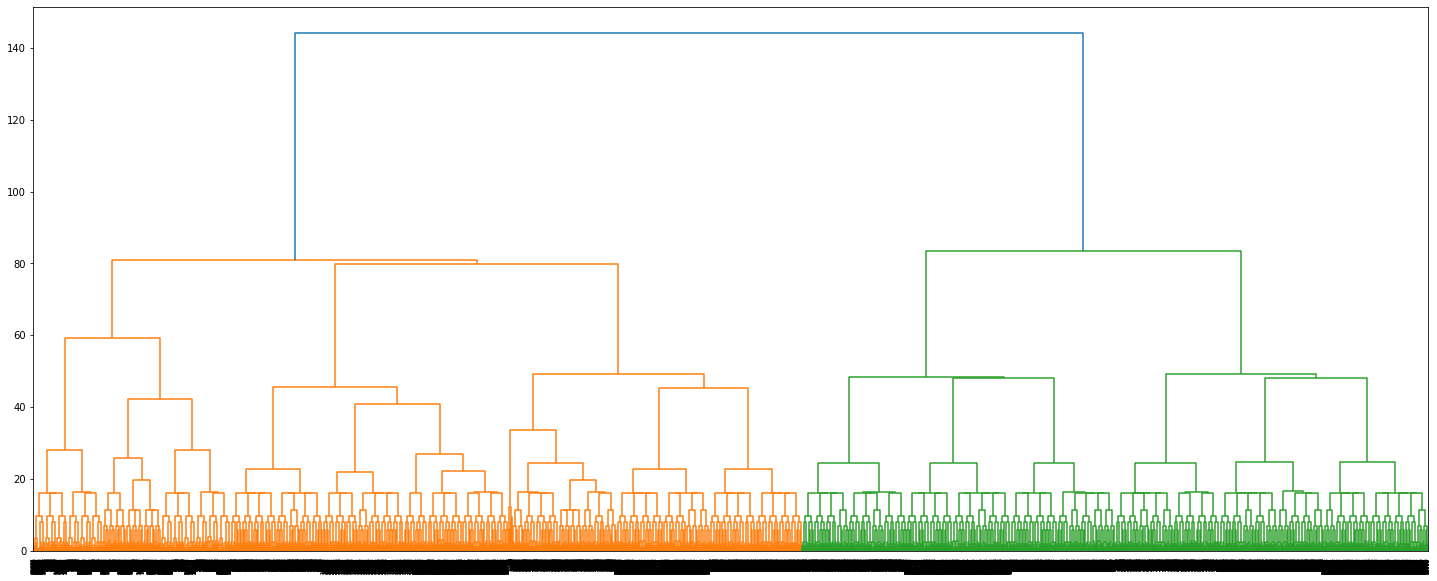

In [ ]:
fig = plt.figure(figsize = (25, 10))
dendro = dendrogram(link_df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_norm)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN()
lables = dbscan.fit_predict(data_pca)

In [ ]:
df = pd.DataFrame(data_pca)
df['labels'] = lables

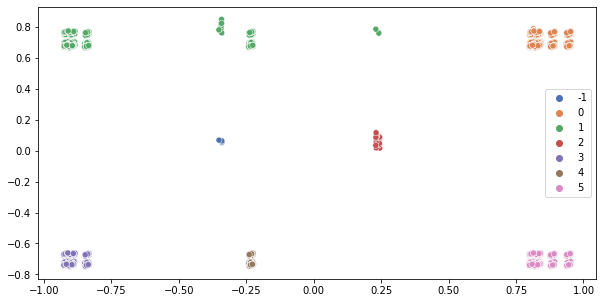

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (10, 5))
plt.rc('axes', labelsize = 20)
sns.scatterplot(x = data_pca[:,0], y = data_pca[:,1], hue = lables, palette="deep")